In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [83]:
DATASET = "./Dataset"
df = pd.read_csv(os.path.join(DATASET, "dataset_completo_e_tratado.csv"))
df

,Unnamed: 0,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,chutes_visitante,chutes_no_alvo_visitante,posse_de_bola_visitante,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante
0,0,4987,1,9/5/2015,18:32,Chapecoense,Coritiba,4-2-3-1,3-5-2,V. Eutrópio,...,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
1,1,4988,1,9/5/2015,18:33,Palmeiras,Atletico-MG,4-2-3-1,4-2-3-1,O. de Oliveira Filho,...,10.0,0.0,50%,426.0,NaN,14.0,4.0,0.0,4.0,2.0
2,2,4989,1,9/5/2015,21:00,Fluminense,Joinville,4-3-1-2,4-4-1-1,S. Drubscky de Campos,...,3.0,0.0,26%,250.0,NaN,14.0,0.0,1.0,1.0,3.0
3,3,4990,1,10/5/2015,11:00,Gremio,Ponte Preta,4-2-3-1,4-1-2-1-2,L. Scolari,...,17.0,0.0,55%,473.0,NaN,21.0,4.0,1.0,0.0,10.0
4,4,4991,1,10/5/2015,16:00,Athletico-PR,Internacional,4-2-3-1,4-2-3-1,M. Mendes,...,17.0,0.0,61%,502.0,NaN,17.0,2.0,0.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,3027,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,...,4.0,2.0,43%,389.0,82%,8.0,3.0,1.0,2.0,1.0
3028,3028,8022,38,13/11/2022,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,...,8.0,4.0,59%,463.0,82%,15.0,2.0,0.0,0.0,9.0
3029,3029,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,...,17.0,7.0,41%,351.0,82%,19.0,6.0,0.0,0.0,4.0
3030,3030,8024,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,...,11.0,2.0,52%,306.0,82%,17.0,3.0,0.0,2.0,5.0


In [84]:
df.columns

Index(['Unnamed: 0', 'ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_Placar',
       'visitante_Placar', 'mandante_Estado', 'visitante_Estado',
       'chutes_mandante', 'chutes_no_alvo_mandante', 'posse_de_bola_mandante',
       'passes_mandante', 'precisao_passes_mandante', 'faltas_mandante',
       'cartao_amarelo_mandante', 'cartao_vermelho_mandante',
       'impedimentos_mandante', 'escanteios_mandante', 'chutes_visitante',
       'chutes_no_alvo_visitante', 'posse_de_bola_visitante',
       'passes_visitante', 'precisao_passes_visitante', 'faltas_visitante',
       'cartao_amarelo_visitante', 'cartao_vermelho_visitante',
       'impedimentos_visitante', 'escanteios_visitante'],
      dtype='object')

### Quantidade de escanteios por partida

In [85]:
escanteios_values = list(df["escanteios_mandante"] + df["escanteios_visitante"])

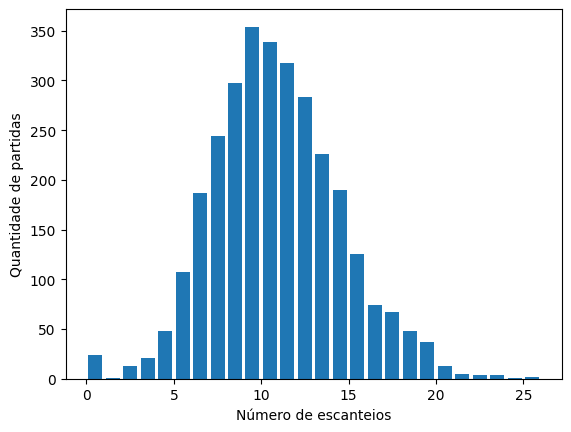

In [86]:
plt.hist(escanteios_values, int(max(escanteios_values)), rwidth=0.8)
plt.xlabel("Número de escanteios")
plt.ylabel("Quantidade de partidas")
plt.show()

### P(jogo ter == nº escanteios)

In [87]:
def plot_bar(x, y, title, xlabel, ylabel, arange=(0, 1.05, 0.05)):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x, y, width=0.8, label="CDF")
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(arange[0], arange[1], arange[2]))    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

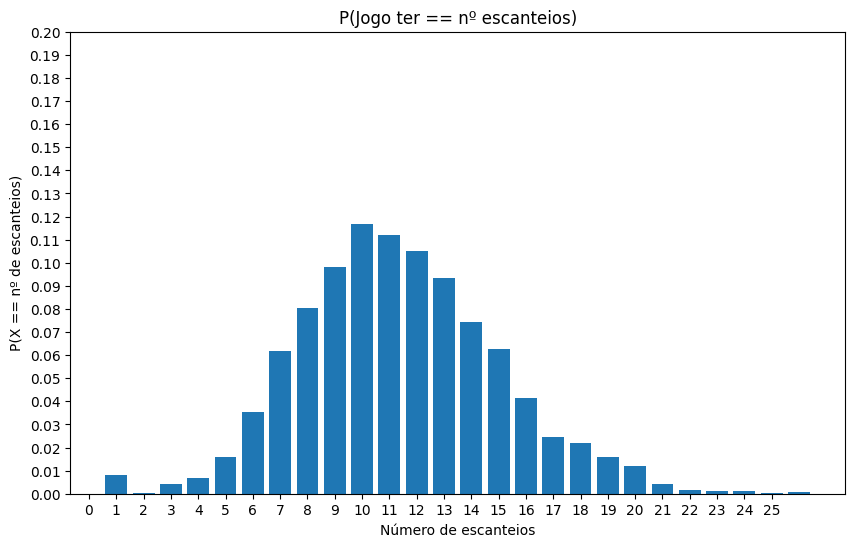

In [88]:
count, bins_count = np.histogram(escanteios_values, bins=int(max(escanteios_values)))
pdf = count / sum(count)

title = "P(Jogo ter == nº escanteios)"
xlabel = "Número de escanteios"
ylabel = "P(X == nº de escanteios)"

plot_bar(bins_count[1:], pdf, title, xlabel, ylabel, arange=(0, 0.21, 0.01))

### P(Jogo estar entre uma faixa de valores)

In [89]:
faixa = [9, 10, 11]
p = sum(pdf[9:12])
p

0.33344327176781

### P(jogo ter <= nº de partidas)

In [90]:
count, bins_count = np.histogram(escanteios_values, bins=int(max(escanteios_values)))
pdf = count / sum(count)
cdf = np.cumsum(pdf)

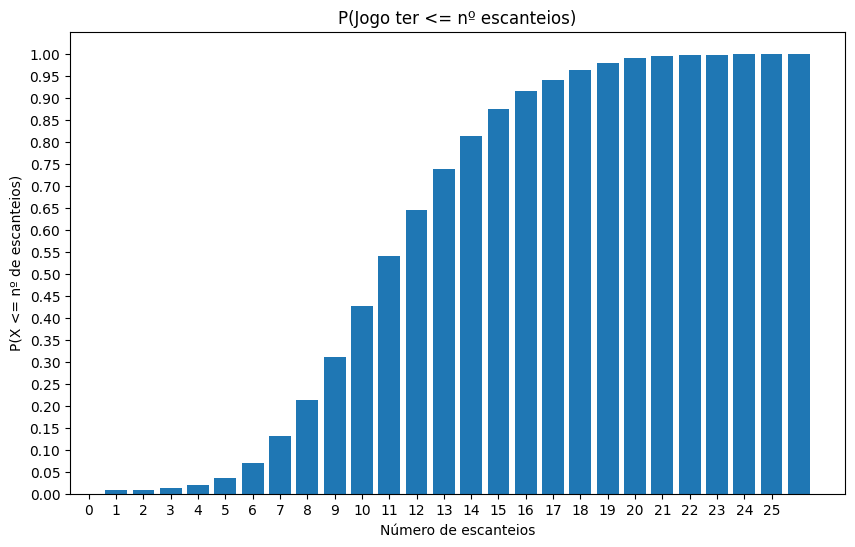

In [91]:
title = "P(Jogo ter <= nº escanteios)"
xlabel = "Número de escanteios"
ylabel = "P(X <= nº de escanteios)"
plot_bar(bins_count[1:], cdf, title, xlabel, ylabel)

### P(jogo ter <= nº de partidas)

In [92]:
pdf.copy()

array([0.00791557, 0.00032982, 0.0042876 , 0.00692612, 0.01583113,
       0.03529024, 0.06167546, 0.08047493, 0.09795515, 0.11675462,
       0.11180739, 0.10488127, 0.09333773, 0.07453826, 0.06266491,
       0.04122691, 0.02440633, 0.02209763, 0.01583113, 0.01220317,
       0.0042876 , 0.00164908, 0.00131926, 0.00131926, 0.00032982,
       0.00065963])

In [93]:
count, bins_count = np.histogram(escanteios_values, bins=int(max(escanteios_values)))
pdf = count / sum(count)


cdf_higher_equal = pdf.copy()
for i in range(len(pdf)):
    for j in range(i + 1, len(pdf)):
        cdf_higher_equal[i] += cdf_higher_equal[j]

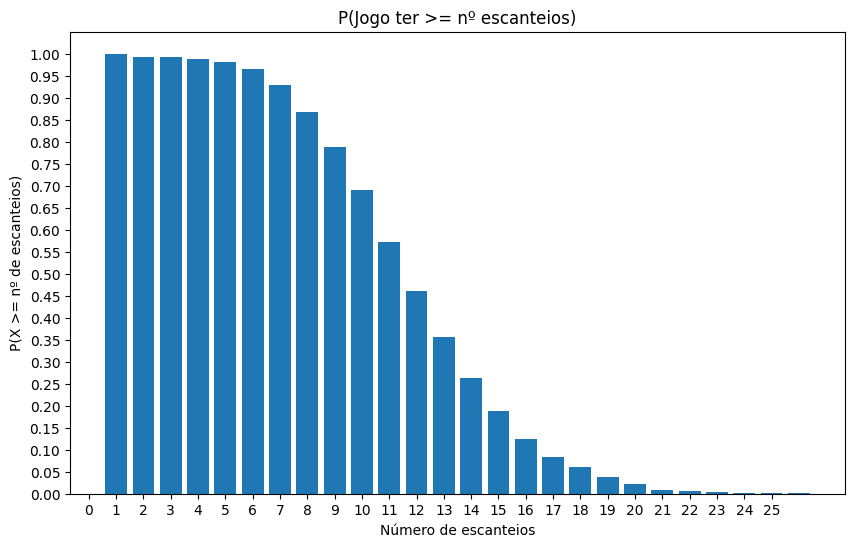

In [94]:
title = "P(Jogo ter >= nº escanteios)"
xlabel = "Número de escanteios"
ylabel = "P(X >= nº de escanteios)"
plot_bar_cdf(bins_count[1:], cdf_higher_equal, title, xlabel, ylabel)